<a href="https://colab.research.google.com/github/Perniciosius/covid-vaccinated-population-pred/blob/master/Poly_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Polynomial Regression**
### Covid fully vaccinated population prediction

### **Upload files**

In [71]:
from google.colab import files
uploaded = files.upload()

Saving world_time_series.csv to world_time_series.csv


### **Import libraries**

In [176]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from matplotlib import pyplot as plt
from datetime import datetime

### **Load dataset**

In [177]:
data = pd.read_csv("world_time_series.csv")
data["Date_Time"] = data["Date_Time"].apply(lambda x: int(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp()))

### **Polynomial Regression**

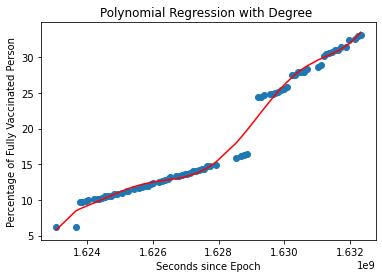

R2 Score:  0.9812770949200346
Mean Squared Error:  1.276218272345598
Root Mean Squared Error 1.1296983103225382






In [178]:
scaler = StandardScaler()
X = data.loc[:, "Date_Time"].values.reshape(-1, 1)
X_scaled = scaler.fit_transform(X)
y = data.loc[:, "Fully Vaccinated Population (%)"].values
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)
model = PolynomialFeatures(degree = 8)
X_train_poly = model.fit_transform(X_train)
X_test_poly = model.fit_transform(X_test)
linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)
y_pred = linear_regression.predict(X_test_poly)
plt.figure()
plt.scatter(X, y)
plt.plot(X, linear_regression.predict(model.fit_transform(X_scaled)), color = "red")
plt.xlabel("Seconds since Epoch")
plt.ylabel("Percentage of Fully Vaccinated Person")
plt.title(f"Polynomial Regression with Degree ")
plt.show()
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error", mean_squared_error(y_test, y_pred, squared = False))
print("\n\n\n")

### **Polynomial Regression different degrees**

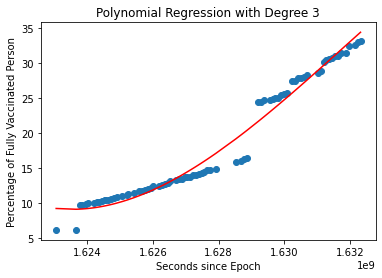

R2 Score:  0.9676292054862821
Mean Squared Error:  2.2065058425659463
Root Mean Squared Error 1.4854311975200825






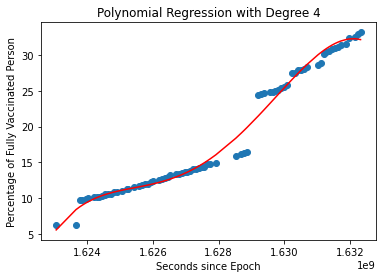

R2 Score:  0.9778056622343133
Mean Squared Error:  1.5128431874329404
Root Mean Squared Error 1.2299769052437288






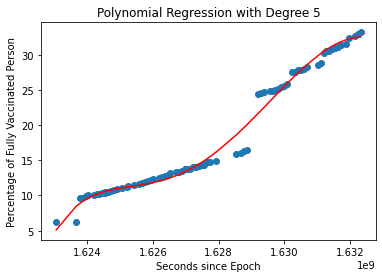

R2 Score:  0.9773011074916891
Mean Squared Error:  1.5472353920179411
Root Mean Squared Error 1.243879170988059






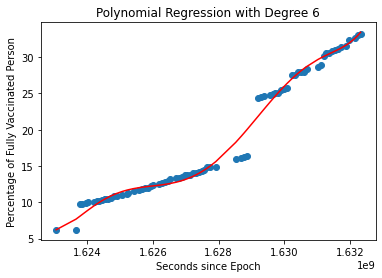

R2 Score:  0.9773263811783269
Mean Squared Error:  1.545512649710639
Root Mean Squared Error 1.243186490318584






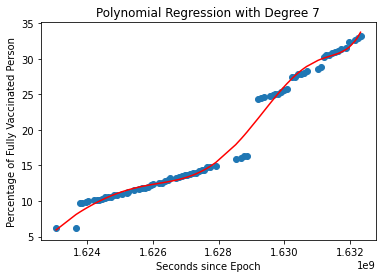

R2 Score:  0.9802404451842411
Mean Squared Error:  1.3468799206951083
Root Mean Squared Error 1.1605515588267108






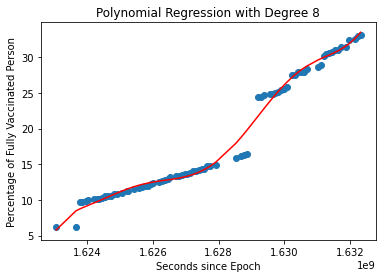

R2 Score:  0.9812770949200346
Mean Squared Error:  1.276218272345598
Root Mean Squared Error 1.1296983103225382






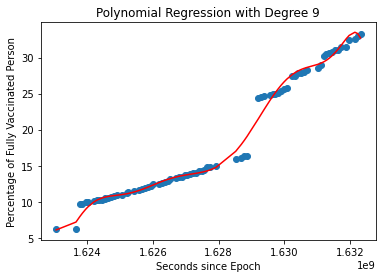

R2 Score:  0.980766066319853
Mean Squared Error:  1.3110517575583605
Root Mean Squared Error 1.1450116844636828






In [179]:
for degree in range(3, 10):
  model = PolynomialFeatures(degree = degree)
  X_train_poly = model.fit_transform(X_train)
  X_test_poly = model.fit_transform(X_test)
  linear_regression = LinearRegression()
  linear_regression.fit(X_train_poly, y_train)
  y_pred = linear_regression.predict(X_test_poly)
  plt.figure()
  plt.scatter(X, y)
  plt.plot(X, linear_regression.predict(model.fit_transform(X_scaled)), color = "red")
  plt.xlabel("Seconds since Epoch")
  plt.ylabel("Percentage of Fully Vaccinated Person")
  plt.title(f"Polynomial Regression with Degree {degree}")
  plt.show()
  print("R2 Score: ", r2_score(y_test, y_pred))
  print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
  print("Root Mean Squared Error", mean_squared_error(y_test, y_pred, squared = False))
  print("\n\n\n")

### **Linear Regression**

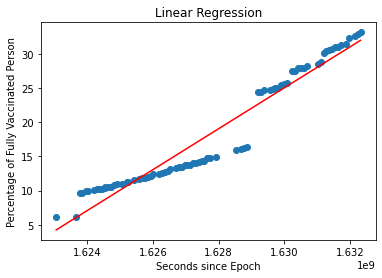

R2 Score:  0.9203962130162249
Mean Squared Error:  5.4260707439738844
Root Mean Squared Error 2.3293927843912208


In [180]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure()
plt.scatter(X, y)
plt.plot(X, model.predict(X_scaled), color = "red")
plt.xlabel("Seconds since Epoch")
plt.ylabel("Percentage of Fully Vaccinated Person")
plt.title("Linear Regression")
plt.show()
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error", mean_squared_error(y_test, y_pred, squared = False))